In [2]:
# Importing the data
import pandas as pd
DataIris = pd.read_csv('IRIS.csv')
DataIris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Keeping the target variable for future reference
TargetVariable=DataIris['class']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=DataIris.drop('class', axis=1)

OnlyPredictors.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Taking out only the Predictor variables
y=TargetVariable.values
X=OnlyPredictors.values

# Printing some sample records
print(X[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


### Finding the best number of clusters based on the inertia value

In [7]:
#automated k value
def detminingk(data,tar):
    TargetVariable=data[tar]
    OnlyPredictors=data.drop(tar, axis=1)
    y=TargetVariable.values
    X=OnlyPredictors.values
    %matplotlib inline
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    inertiaValue = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, 
                    init='random', 
                    n_init=10, 
                    max_iter=300,
                    tol=1e-04,
                    random_state=0)

        km.fit(X)
        inertiaValue.append(km.inertia_)

    plt.plot(range(1, 11), inertiaValue, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.tight_layout()
    plt.show()


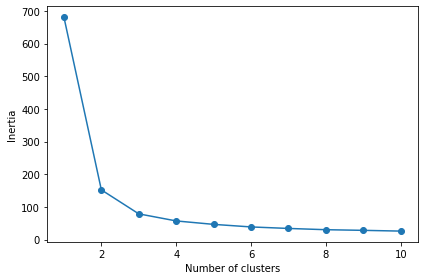

In [8]:
detminingk(DataIris,'class')

### Using above graph deciding optimal number of clusters

# KMeans Clustering

In [8]:
# Defining the K-Means object for best number of clusters. n=3 in this case
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

In [9]:
# Running the clustering algorithm on the data set
predictedCluster = km.fit_predict(X)
print(predictedCluster)
print('Inertia:', km.inertia_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
Inertia: 78.85144142614601


In [10]:
DataIris['PredictedClusterID']=predictedCluster
DataIris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PredictedClusterID
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2
5,5.4,3.9,1.7,0.4,setosa,2
6,4.6,3.4,1.4,0.3,setosa,2
7,5.0,3.4,1.5,0.2,setosa,2
8,4.4,2.9,1.4,0.2,setosa,2
9,4.9,3.1,1.5,0.1,setosa,2


### Visualizing the clusters using any two columns in data

No handles with labels found to put in legend.


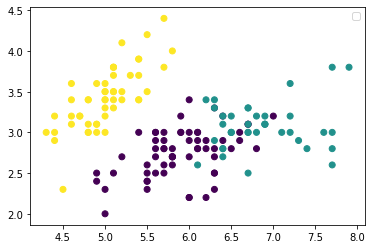

In [11]:
# create scatter plot to visualize the data
%matplotlib inline
plt.scatter(x=DataIris['Sepal.Length'], y=DataIris['Sepal.Width'], c=DataIris['PredictedClusterID'])
plt.legend()